{
    "actor_experience_replay_buffer_buffer_size":100000,
    "actor_experience_replay_buffer_batch_size":512,
    "actor_experience_replay_buffer_seed":2801641275,
    "actor_experience_replay_buffer_dropout":0,
    "critic_experience_replay_buffer_buffer_size":200000,
    "critic_experience_replay_buffer_batch_size":512,
    "critic_experience_replay_buffer_seed":1097855444,
    "critic_experience_replay_buffer_dropout":0,
    "actor_reward_replay_buffer_buffer_size":100000,
    "actor_reward_replay_buffer_batch_size":512,
    "actor_reward_replay_buffer_seed":1328027828,
    "actor_reward_replay_buffer_dropout":0,
    "critic_reward_replay_buffer_buffer_size":200000,
    "critic_reward_replay_buffer_batch_size":512,
    "critic_reward_replay_buffer_seed":2419977517,
    "critic_reward_replay_buffer_dropout":0,
    "nn_seed":3523186978,
    "hyperparameters":{
        "Actor_of_Sensor":{
            "learning_rate":0.0001,
            "linear_hidden_units":[
                64,
    

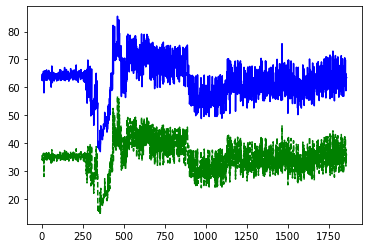

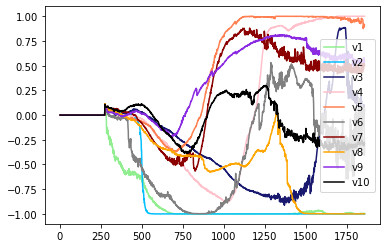

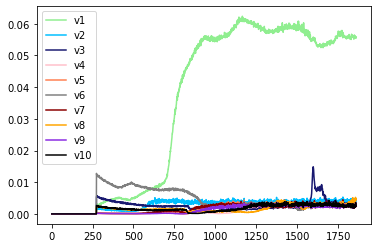

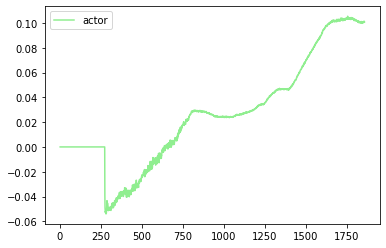

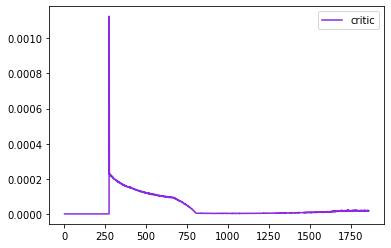

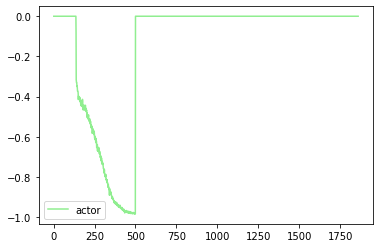

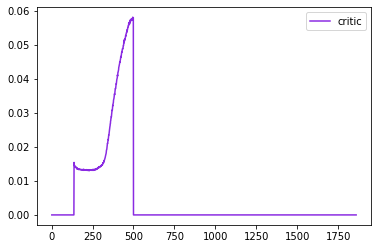

In [3]:
from File_Name import project_dir, data
from Utilities.FileOperator import load_obj, load_name
import pandas as pd
import matplotlib.pyplot as plt
import json

pd.set_option('display.max_rows', None)
#
# def print_env():
#
def draw_results(is_CSV, given_list_file_name):
    if is_CSV:
        df = pd.read_csv(given_list_file_name, names=["Epoch index", "Total reward", "new_age_of_view", "Time taken"], header=0)
        # df = df[df["Epoch index"] <= 1000]
        epoch_index = df["Epoch index"].values.tolist()
        rewards = df["Total reward"].values.tolist()
        plt.plot(epoch_index, rewards, '-', color='b')  # s-:方形
        plt.show()
    else:
        correct_list_file_name = given_list_file_name
        list_file = load_obj(name=correct_list_file_name)
        # print(list_file)
        init_agent_config = load_obj(load_name(list_file, "init_agent_config_name"))
        # print(init_agent_config)
        print(json.dumps(init_agent_config.__dict__, indent=4, separators=(',', ':')))

        # print(json.dumps(init_agent_config.hyperparameters, indent=4, separators=(',', ':')))

        csv_file_name = load_name(list_file, 'temple_result_name')
        df = pd.read_csv(csv_file_name, names=["Epoch index", "Total reward", "new_age_of_view", "Time taken"], header=0)
        # df = pd.read_csv(csv_file_name, names=["Epoch index", "age_of_view", "new_age_of_view", "timeliness", "consistence", "completeness", "intel_arrival_time", "queuing_time", "transmitting_time", "service_time", "service_rate", "received_data", "required_data"], header=0)
        # df = df[df["Epoch index"] >= 300]
        # df = df[df["Epoch index"] <= 400]
        epoch_index = df["Epoch index"].values.tolist()
        rewards = df["Total reward"].values.tolist()
        new_rewards = df["new_age_of_view"].values.tolist()
        plt.plot(epoch_index, rewards, '-', color='b', label="R")  # s-:方形
        plt.plot(epoch_index, new_rewards, '--', color='g', label="NR")  # o-:圆形
        # plt.xlabel("region length")  # 横坐标名字
        # plt.ylabel("accuracy")  # 纵坐标名字
        # plt.legend(loc="best")  # 图例
        # plt.savefig('results.png')
        plt.show()


def draw_other_results(given_list_file_name):
    time = given_list_file_name.replace("-list_file_name.pkl", "")
    ra_result_name = project_dir + data + time + "-ra_result.csv"
    df = pd.read_csv(ra_result_name, names=["Epoch index", "Total reward", "Time taken"], header=0)
    epoch_index = df["Epoch index"].values.tolist()
    rewards = df["Total reward"].values.tolist()
    plt.plot(epoch_index, rewards, '-', color='b')  # s-:方形
    # plt.plot(x, k2, 'o-', color='g', label="CNN-RLSTM")  # o-:圆形
    # plt.xlabel("region length")  # 横坐标名字
    # plt.ylabel("accuracy")  # 纵坐标名字
    # plt.legend(loc="best")  # 图例
    # plt.savefig('results.png')
    plt.show()


def read_loss(is_CSV, given_list_file_name):
    if is_CSV:
        df = pd.read_csv(given_list_file_name, names=["Epoch index",
                                            "Actor of V1", "Actor of V2", "Actor of V3",
                                            "Actor of V4", "Actor of V5", "Actor of V6",
                                            "Actor of V7", "Actor of V8", "Actor of V9",
                                            "Actor of V10",
                                            "Critic of V1", "Critic of V2", "Critic of V3",
                                            "Critic of V4", "Critic of V5", "Critic of V6",
                                            "Critic of V7", "Critic of V8", "Critic of V9",
                                            "Critic of V10",
                                            "Actor of Edge", "Critic of Edge",
                                            "Actor of Reward", "Critic of Reward"], header=0)
        df = df[df["Epoch index"] >= 0]
        # df = df[df["Epoch index"] <= 1000]
        return df
    else:
        correct_list_file_name = given_list_file_name
        list_file = load_obj(name=correct_list_file_name)
        csv_file_name = load_name(list_file, 'temple_loss_name')
        df = pd.read_csv(csv_file_name, names=["Epoch index",
                                            "Actor of V1", "Actor of V2", "Actor of V3",
                                            "Actor of V4", "Actor of V5", "Actor of V6",
                                            "Actor of V7", "Actor of V8", "Actor of V9",
                                            "Actor of V10",
                                            "Critic of V1", "Critic of V2", "Critic of V3",
                                            "Critic of V4", "Critic of V5", "Critic of V6",
                                            "Critic of V7", "Critic of V8", "Critic of V9",
                                            "Critic of V10",
                                            "Actor of Edge", "Critic of Edge",
                                            "Actor of Reward", "Critic of Reward"], header=0)
        df = df[df["Epoch index"] >= 0]
        # df = df[df["Epoch index"] <= 1000]
        return df


def draw_actor_loss_of_sensor_nodes(is_CSV, given_list_file_name):
    df = read_loss(is_CSV, given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    actor_loss_of_v1 = df["Actor of V1"].values.tolist()
    actor_loss_of_v2 = df["Actor of V2"].values.tolist()
    actor_loss_of_v3 = df["Actor of V3"].values.tolist()
    actor_loss_of_v4 = df["Actor of V4"].values.tolist()
    actor_loss_of_v5 = df["Actor of V5"].values.tolist()
    actor_loss_of_v6 = df["Actor of V6"].values.tolist()
    actor_loss_of_v7 = df["Actor of V7"].values.tolist()
    actor_loss_of_v8 = df["Actor of V8"].values.tolist()
    actor_loss_of_v9 = df["Actor of V9"].values.tolist()
    actor_loss_of_v10 = df["Actor of V10"].values.tolist()
    plt.plot(epoch_index, actor_loss_of_v1, '-', color='lightgreen', label='v1')
    plt.plot(epoch_index, actor_loss_of_v2, '-', color='deepskyblue', label='v2')
    plt.plot(epoch_index, actor_loss_of_v3, '-', color='midnightblue', label='v3')
    plt.plot(epoch_index, actor_loss_of_v4, '-', color='pink', label='v4')
    plt.plot(epoch_index, actor_loss_of_v5, '-', color='coral', label='v5')
    plt.plot(epoch_index, actor_loss_of_v6, '-', color='gray', label='v6')
    plt.plot(epoch_index, actor_loss_of_v7, '-', color='darkred', label='v7')
    plt.plot(epoch_index, actor_loss_of_v8, '-', color='orange', label='v8')
    plt.plot(epoch_index, actor_loss_of_v9, '-', color='blueviolet', label='v9')
    plt.plot(epoch_index, actor_loss_of_v10, '-', color='black', label='v10')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_critic_loss_of_sensor_nodes(is_CSV, given_list_file_name):
    df = read_loss(is_CSV, given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    critic_loss_of_v1 = df["Critic of V1"].values.tolist()
    critic_loss_of_v2 = df["Critic of V2"].values.tolist()
    critic_loss_of_v3 = df["Critic of V3"].values.tolist()
    critic_loss_of_v4 = df["Critic of V4"].values.tolist()
    critic_loss_of_v5 = df["Critic of V5"].values.tolist()
    critic_loss_of_v6 = df["Critic of V6"].values.tolist()
    critic_loss_of_v7 = df["Critic of V7"].values.tolist()
    critic_loss_of_v8 = df["Critic of V8"].values.tolist()
    critic_loss_of_v9 = df["Critic of V9"].values.tolist()
    critic_loss_of_v10 = df["Critic of V10"].values.tolist()
    plt.plot(epoch_index, critic_loss_of_v1, '-', color='lightgreen', label='v1')
    plt.plot(epoch_index, critic_loss_of_v2, '-', color='deepskyblue', label='v2')
    plt.plot(epoch_index, critic_loss_of_v3, '-', color='midnightblue', label='v3')
    plt.plot(epoch_index, critic_loss_of_v4, '-', color='pink', label='v4')
    plt.plot(epoch_index, critic_loss_of_v5, '-', color='coral', label='v5')
    plt.plot(epoch_index, critic_loss_of_v6, '-', color='gray', label='v6')
    plt.plot(epoch_index, critic_loss_of_v7, '-', color='darkred', label='v7')
    plt.plot(epoch_index, critic_loss_of_v8, '-', color='orange', label='v8')
    plt.plot(epoch_index, critic_loss_of_v9, '-', color='blueviolet', label='v9')
    plt.plot(epoch_index, critic_loss_of_v10, '-', color='black', label='v10')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_actor_loss_of_edge(is_CSV, given_list_file_name):
    df = read_loss(is_CSV, given_list_file_name)
    # df = df[df["Epoch index"] >= 700]
    # df = df[df["Epoch index"] <= 800]
    epoch_index = df["Epoch index"].values.tolist()
    actor_loss_of_edge = df["Actor of Edge"].values.tolist()
    plt.plot(epoch_index, actor_loss_of_edge, '-', color='lightgreen', label='actor')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_critic_loss_of_edge(is_CSV, given_list_file_name):
    df = read_loss(is_CSV, given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    critic_loss_of_edge = df["Critic of Edge"].values.tolist()
    plt.plot(epoch_index, critic_loss_of_edge, '-', color='blueviolet', label='critic')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_actor_loss_of_reward(is_CSV, given_list_file_name):
    df = read_loss(is_CSV, given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    actor_loss_of_reward = df["Actor of Reward"].values.tolist()
    plt.plot(epoch_index, actor_loss_of_reward, '-', color='lightgreen', label='actor')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_critic_loss_of_reward(is_CSV, given_list_file_name):
    df = read_loss(is_CSV, given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    critic_loss_of_reward = df["Critic of Reward"].values.tolist()
    plt.plot(epoch_index, critic_loss_of_reward, '-', color='blueviolet', label='critic')
    plt.legend(loc="best")  # 图例
    plt.show()


if __name__ == '__main__':
    file_name = '2021-09-14-04-49-44-list_file_name.pkl'
    
    # file_name = '2021-09-29-15-43-27-list_file_name.pkl'   # delay the trian start time of nodes
    # file_name = '2021-09-29-16-16-31-list_file_name.pkl'   # batch size is bigger
    # file_name = '2021-09-29-20-11-11-list_file_name.pkl'    # batch size and training times is bigger
    
    # file_name = '2021-10-01-14-54-33-list_file_name.pkl'  # add training strength 
    # file_name = '2021-10-01-20-16-44-list_file_name.pkl'  # setup as origin
    # file_name = '2021-10-01-20-57-22-list_file_name.pkl'  
    
    # file_name = '2021-10-02-09-53-45-list_file_name.pkl' # lr = 1e-3
    # file_name = '2021-10-02-10-07-42-list_file_name.pkl' # lr = 1e-4
    # file_name = '2021-10-02-10-13-36-list_file_name.pkl' # lr = 1e-5
    # file_name = '2021-10-02-10-21-36-list_file_name.pkl' # lr = 1e-6

    # file_name = '2021-10-02-10-28-42-list_file_name.pkl' # lr=1e-6 batch_size=256 pre_session=4 time_taken=3
    # file_name = '2021-10-02-10-33-42-list_file_name.pkl' # lr=1e-6 batch_size=256 pre_session=8 time_taken=5
    # file_name = '2021-10-02-10-39-28-list_file_name.pkl' # lr=1e-6 batch_size=128 pre_session=16 time_taken=5.5
    # file_name = '2021-10-02-10-49-48-list_file_name.pkl' # lr=1e-6 batch_size=256 pre_session=16 time_taken=7.5
    # file_name = '2021-10-02-10-59-40-list_file_name.pkl' # lr=1e-6 batch_size=512 pre_session=8 time_taken=7.5
    # file_name = '2021-10-02-11-10-13-list_file_name.pkl' # lr=1e-6 batch_size=512 pre_session=8 reward_pre_session=16 time_taken=8

    # file_name = '2021-10-02-11-34-43-list_file_name.pkl'
    # file_name = '2021-10-02-14-52-38-list_file_name.pkl'
    # file_name = '2021-10-02-15-13-28-list_file_name.pkl'
    # file_name = '2021-10-02-15-23-45-list_file_name.pkl'
    # file_name = '2021-10-02-15-33-28-list_file_name.pkl'
    # file_name = '2021-10-02-15-41-08-list_file_name.pkl'
    # file_name = '2021-10-02-16-19-07-list_file_name.pkl'
    # file_name = '2021-10-02-16-26-58-list_file_name.pkl'
    # file_name = '2021-10-02-16-38-13-list_file_name.pkl'
    # file_name = '2021-10-02-17-34-38-list_file_name.pkl'
    # file_name = '2021-10-02-17-50-58-list_file_name.pkl'

    # file_name = '2021-10-02-18-42-49-list_file_name.pkl'
    # file_name = '2021-10-02-18-56-45-list_file_name.pkl'
    # file_name = '2021-10-03-11-37-13-list_file_name.pkl'
    # file_name = '2021-10-03-19-06-38-list_file_name.pkl'
    # file_name = '2021-10-03-19-14-11-list_file_name.pkl'  # std_noise * 10
    # file_name = '2021-10-03-19-20-49-list_file_name.pkl'    # std_noise is very small
    # file_name = '2021-10-03-19-26-51-list_file_name.pkl'
    # file_name = '2021-10-03-19-32-54-list_file_name.pkl'
    # file_name = '2021-10-03-19-47-00-list_file_name.pkl'
    # file_name = '2021-10-03-20-04-10-list_file_name.pkl'
    # file_name = '2021-10-03-20-41-08-list_file_name.pkl'
    # file_name = '2021-10-04-20-10-37-list_file_name.pkl'
    # file_name = '2021-10-05-09-44-32-list_file_name.pkl'
    # file_name = '2021-10-05-15-26-09-list_file_name.pkl'
    # file_name  = '2021-10-05-17-09-41-list_file_name.pkl'
    # file_name = '2021-10-05-19-36-08-list_file_name.pkl'
    # file_name = '2021-10-07-18-01-50-list_file_name.pkl'
    # file_name = '2021-10-07-19-06-03-list_file_name.pkl'
    # file_name = '2021-10-07-20-12-23-list_file_name.pkl'
    # file_name = '2021-10-07-22-51-29-list_file_name.pkl'
    # file_name = '2021-10-08-10-39-50-list_file_name.pkl'
    # file_name = '2021-10-08-10-53-30-list_file_name.pkl'
    file_name = '2021-10-18-16-57-25-list_file_name.pkl'

    file_name = '2021-10-19-16-54-31-list_file_name.pkl'
    # results_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data_Copyed/2021-10-08-15-42-00/temple_result_8046c65d538b45f19d6b80da8cc49e9d.csv'
    # loss_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data_Copyed/2021-10-08-14-44-56/temple_loss_75ccf25b273747bf966b31b7437eddfd.csv'
    
    # results_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data_Copyed/2021-10-09-09-26-12/temple_result_f5587a5e6a194f879657a31262afc7e4.csv'
    # loss_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data_Copyed/2021-10-09-09-26-12/temple_loss_10a0f1958b0e498eb87f9f606ae575fd.csv'
    
    # results_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-14-26-46/temple_result_f19109b6f00e4261a26b0555240d1e4f.csv'
    # loss_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-14-26-46/temple_loss_2ec495abcb8748fcb9532defafd655f3.csv'
    
    # results_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-15-47-21/temple_result_dc0b0bcc201a4c6390510c83bb35cb92.csv'
    # loss_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-15-47-21/temple_loss_19594ab4de8c48bf910401f78fcf7cb5.csv'
    
    # results_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-22-17-56/temple_result_1e76e6952d22466d8079b32298760ba2.csv'
    # loss_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-22-17-56/temple_loss_c980641ac2bf4365bf66ac525c20665d.csv'

    # no.1
    # results_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-23-20-34/temple_result_d1948991c173428985ff1263e3399317.csv'
    # loss_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-09-23-20-34/temple_loss_7e5f5455cf994b29aae3523a8ccbc609.csv'

    # results_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-10-08-12-16/temple_result_6599e1f9937243c9a988aceeff1cdde5.csv'
    # loss_csv = '/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data0914/2021-10-10-08-12-16/temple_loss_29d8c25194144d999127d1e5acb6346b.csv'
    
    # results_csv = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1019/2021-10-20-10-38-48/temple_result_535f22cc54b442a28a8f486c1fbbf4d9.csv"
    # loss_csv = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1019/2021-10-20-10-38-48/temple_loss_9dbf4c5f182c4453877879193c3b7ab4.csv"

    results_csv = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1019/2021-10-20-11-22-07/temple_result_79faae49b5bc4392b475fcc25bd650da.csv"
    loss_csv = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1019/2021-10-20-11-22-07/temple_loss_06b93df338d24e58a93a9bbd1c5198be.csv"
    
    # results_csv = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1019/2021-10-20-14-43-39/temple_result_f3e9e1fc4295489aa5ac6a5667b0d3ac.csv"
    # loss_csv = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1019/2021-10-20-14-43-39/temple_loss_caef18a1f04049968b9f2fbcd0eca980.csv"

    # draw_results(True, results_csv)
    # # draw_other_results(file_name)
    
    # draw_actor_loss_of_sensor_nodes(True, given_list_file_name=loss_csv)
    # draw_critic_loss_of_sensor_nodes(True, given_list_file_name=loss_csv)
    # draw_actor_loss_of_edge(True, given_list_file_name=loss_csv)
    # draw_critic_loss_of_edge(True, given_list_file_name=loss_csv)
    # draw_actor_loss_of_reward(True, given_list_file_name=loss_csv)
    # draw_critic_loss_of_reward(True, given_list_file_name=loss_csv)

    # file_name = "2021-10-21-22-33-22-list_file_name.pkl"
    file_name = "2021-10-22-14-29-19-list_file_name.pkl"
    file_name = "2021-10-22-21-25-22-list_file_name.pkl"
    # file_name = "2021-10-22-21-29-17-list_file_name.pkl"
    # file_name = "2021-10-22-21-27-22-list_file_name.pkl"
    # file_name = "2021-10-22-21-33-12-list_file_name.pkl"
    # file_name = "2021-10-22-21-34-48-list_file_name.pkl"
    file_name = "2021-10-24-19-42-18-list_file_name.pkl"
    file_name = "2021-10-24-22-48-03-list_file_name.pkl"
    file_name = "2021-10-25-10-22-14-list_file_name.pkl"

    file_name = "2021-10-25-15-08-41-list_file_name.pkl"
    file_name = "2021-10-25-17-44-25-list_file_name.pkl"
    file_name = "2021-10-25-22-34-19-list_file_name.pkl"

    # bandwidth=1
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_1_threshold_015_02/2021-10-25-17-37-00-list_file_name.pkl"
    # bandwidth=2
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_2_threshold_015_02/2021-10-25-17-38-13-list_file_name.pkl"
    # bandwidth=2.5
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_2_5_threshold_015_02/2021-10-26-15-17-16-list_file_name.pkl"
    # bandwidth=3
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_3_threshold_015_02/2021-10-25-15-08-41-list_file_name.pkl"
    # bandwidth=4
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_4_threshold_015_02/2021-10-25-17-42-19-list_file_name.pkl"
    # bandwidth=5
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_5_threshold_015_02/2021-10-25-17-44-25-list_file_name.pkl"
    
    # threshold=005
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_3_threshold_005_02/2021-10-25-22-29-31-list_file_name.pkl"
    # threshold=010
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_3_threshold_010_02/2021-10-25-22-31-12-list_file_name.pkl"
    # threshold=020
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_3_threshold_020_02/2021-10-25-22-34-19-list_file_name.pkl"
    # threshold=025
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_3_threshold_025_02/2021-10-25-22-35-33-list_file_name.pkl"

    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_05_05/2021-11-10-10-17-09-list_file_name.pkl"
    # time = 1000
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/1000/bandwidth_3_threshold_015_02/2021-10-26-09-10-33-list_file_name.pkl"
    # time = 1200
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/1200/bandwidth_3_threshold_015_02/2021-10-26-09-12-26-list_file_name.pkl"
    # time = 1800
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/1800/bandwidth_3_threshold_015_02/2021-10-26-09-14-56-list_file_name.pkl"
    # time = 2200
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/2200/bandwidth_3_threshold_015_02/2021-10-26-09-17-28-list_file_name.pkl"

    # iddpg bandwidth=2
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/0800/bandwidth_2_threshold_015_02/2021-10-26-22-27-57-list_file_name.pkl"

    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/1200/bandwidth_3_threshold_015_01/2021-10-27-18-34-25-list_file_name.pkl"
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Agents/1116/1800/bandwidth_3_threshold_015_01/2021-10-27-18-37-42-list_file_name.pkl"
    
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1107_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-07-20-40-27-list_file_name.pkl"
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1107_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-07-22-47-55-list_file_name.pkl"
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1107_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-07-22-49-02-list_file_name.pkl"

    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1108_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-08-09-41-20-list_file_name.pkl"

    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1109_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-08-22-04-56-list_file_name.pkl"
    
    # bandwidth = 3
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1109_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-09-10-07-50-list_file_name.pkl"
    # bandwidth = 2
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1109_Agents/1116/0800/bandwidth_2_threshold_05_01/2021-11-09-14-41-23-list_file_name.pkl"

    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_05_05/2021-11-10-10-17-09-list_file_name.pkl"
    
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-10-11-36-38-list_file_name.pkl"
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_05_02/2021-11-10-15-34-22-list_file_name.pkl"
    
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-10-20-13-19-list_file_name.pkl"
    
    # bandwidth = 1
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_1_threshold_05_01/2021-11-11-12-17-33-list_file_name.pkl"
    # bandwidth = 2
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_2_threshold_05_01/2021-11-11-12-21-18-list_file_name.pkl"
    # bandwidth = 3
    file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-10-20-13-19-list_file_name.pkl"
    # bandwidth = 4
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_4_threshold_05_01/2021-11-11-12-26-04-list_file_name.pkl"
    # bandwidth = 5
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_5_threshold_05_01/2021-11-11-12-28-23-list_file_name.pkl"

    # thershold = 3
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_03_01/2021-11-12-14-08-18-list_file_name.pkl"
    # thershold = 4
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_04_01/2021-11-12-17-57-29-list_file_name.pkl"
    # thershold = 6
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_06_01/2021-11-12-23-10-29-list_file_name.pkl"
    # thershold = 7
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_07_01/2021-11-13-09-04-08-list_file_name.pkl"

    # time = 10
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/1000/bandwidth_3_threshold_05_01/2021-11-13-14-28-26-list_file_name.pkl"

    # bandwidth = 3
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/bandwidth_3_threshold_05_01/2021-11-14-10-28-50-list_file_name.pkl"
    
    # IDDPG
    # bandwidth = 3
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/iddpg/bandwidth_3_threshold_05_01/2021-11-15-12-17-38-list_file_name.pkl"
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/iddpg/bandwidth_3_threshold_05_01/2021-11-15-14-52-07-list_file_name.pkl"
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/iddpg/bandwidth_3_threshold_05_01/2021-11-15-15-30-23-list_file_name.pkl"

    # learning rata is smaller
    # ile_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/iddpg/bandwidth_3_threshold_05_01/2021-11-15-16-06-46-list_file_name.pkl"
    # random reward
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/iddpg/bandwidth_3_threshold_05_01/2021-11-15-16-08-37-list_file_name.pkl"

    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/iddpg/bandwidth_1_threshold_05_01/2021-11-15-22-24-33-list_file_name.pkl"
    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/iddpg/bandwidth_1_threshold_05_01/2021-11-15-22-47-48-list_file_name.pkl"

    # file_name = "/home/neardws/Hierarchical-Reinforcement-Learning/Data/Data1110_Agents/1116/0800/iddpg/bandwidth_5_threshold_05_01/2021-11-15-22-35-59-list_file_name.pkl"

    draw_results(False, file_name)
    draw_actor_loss_of_sensor_nodes(False, given_list_file_name=file_name)
    draw_critic_loss_of_sensor_nodes(False, given_list_file_name=file_name)
    draw_actor_loss_of_edge(False, given_list_file_name=file_name)
    draw_critic_loss_of_edge(False, given_list_file_name=file_name)
    draw_actor_loss_of_reward(False, given_list_file_name=file_name)
    draw_critic_loss_of_reward(False, given_list_file_name=file_name)
